# Introduction

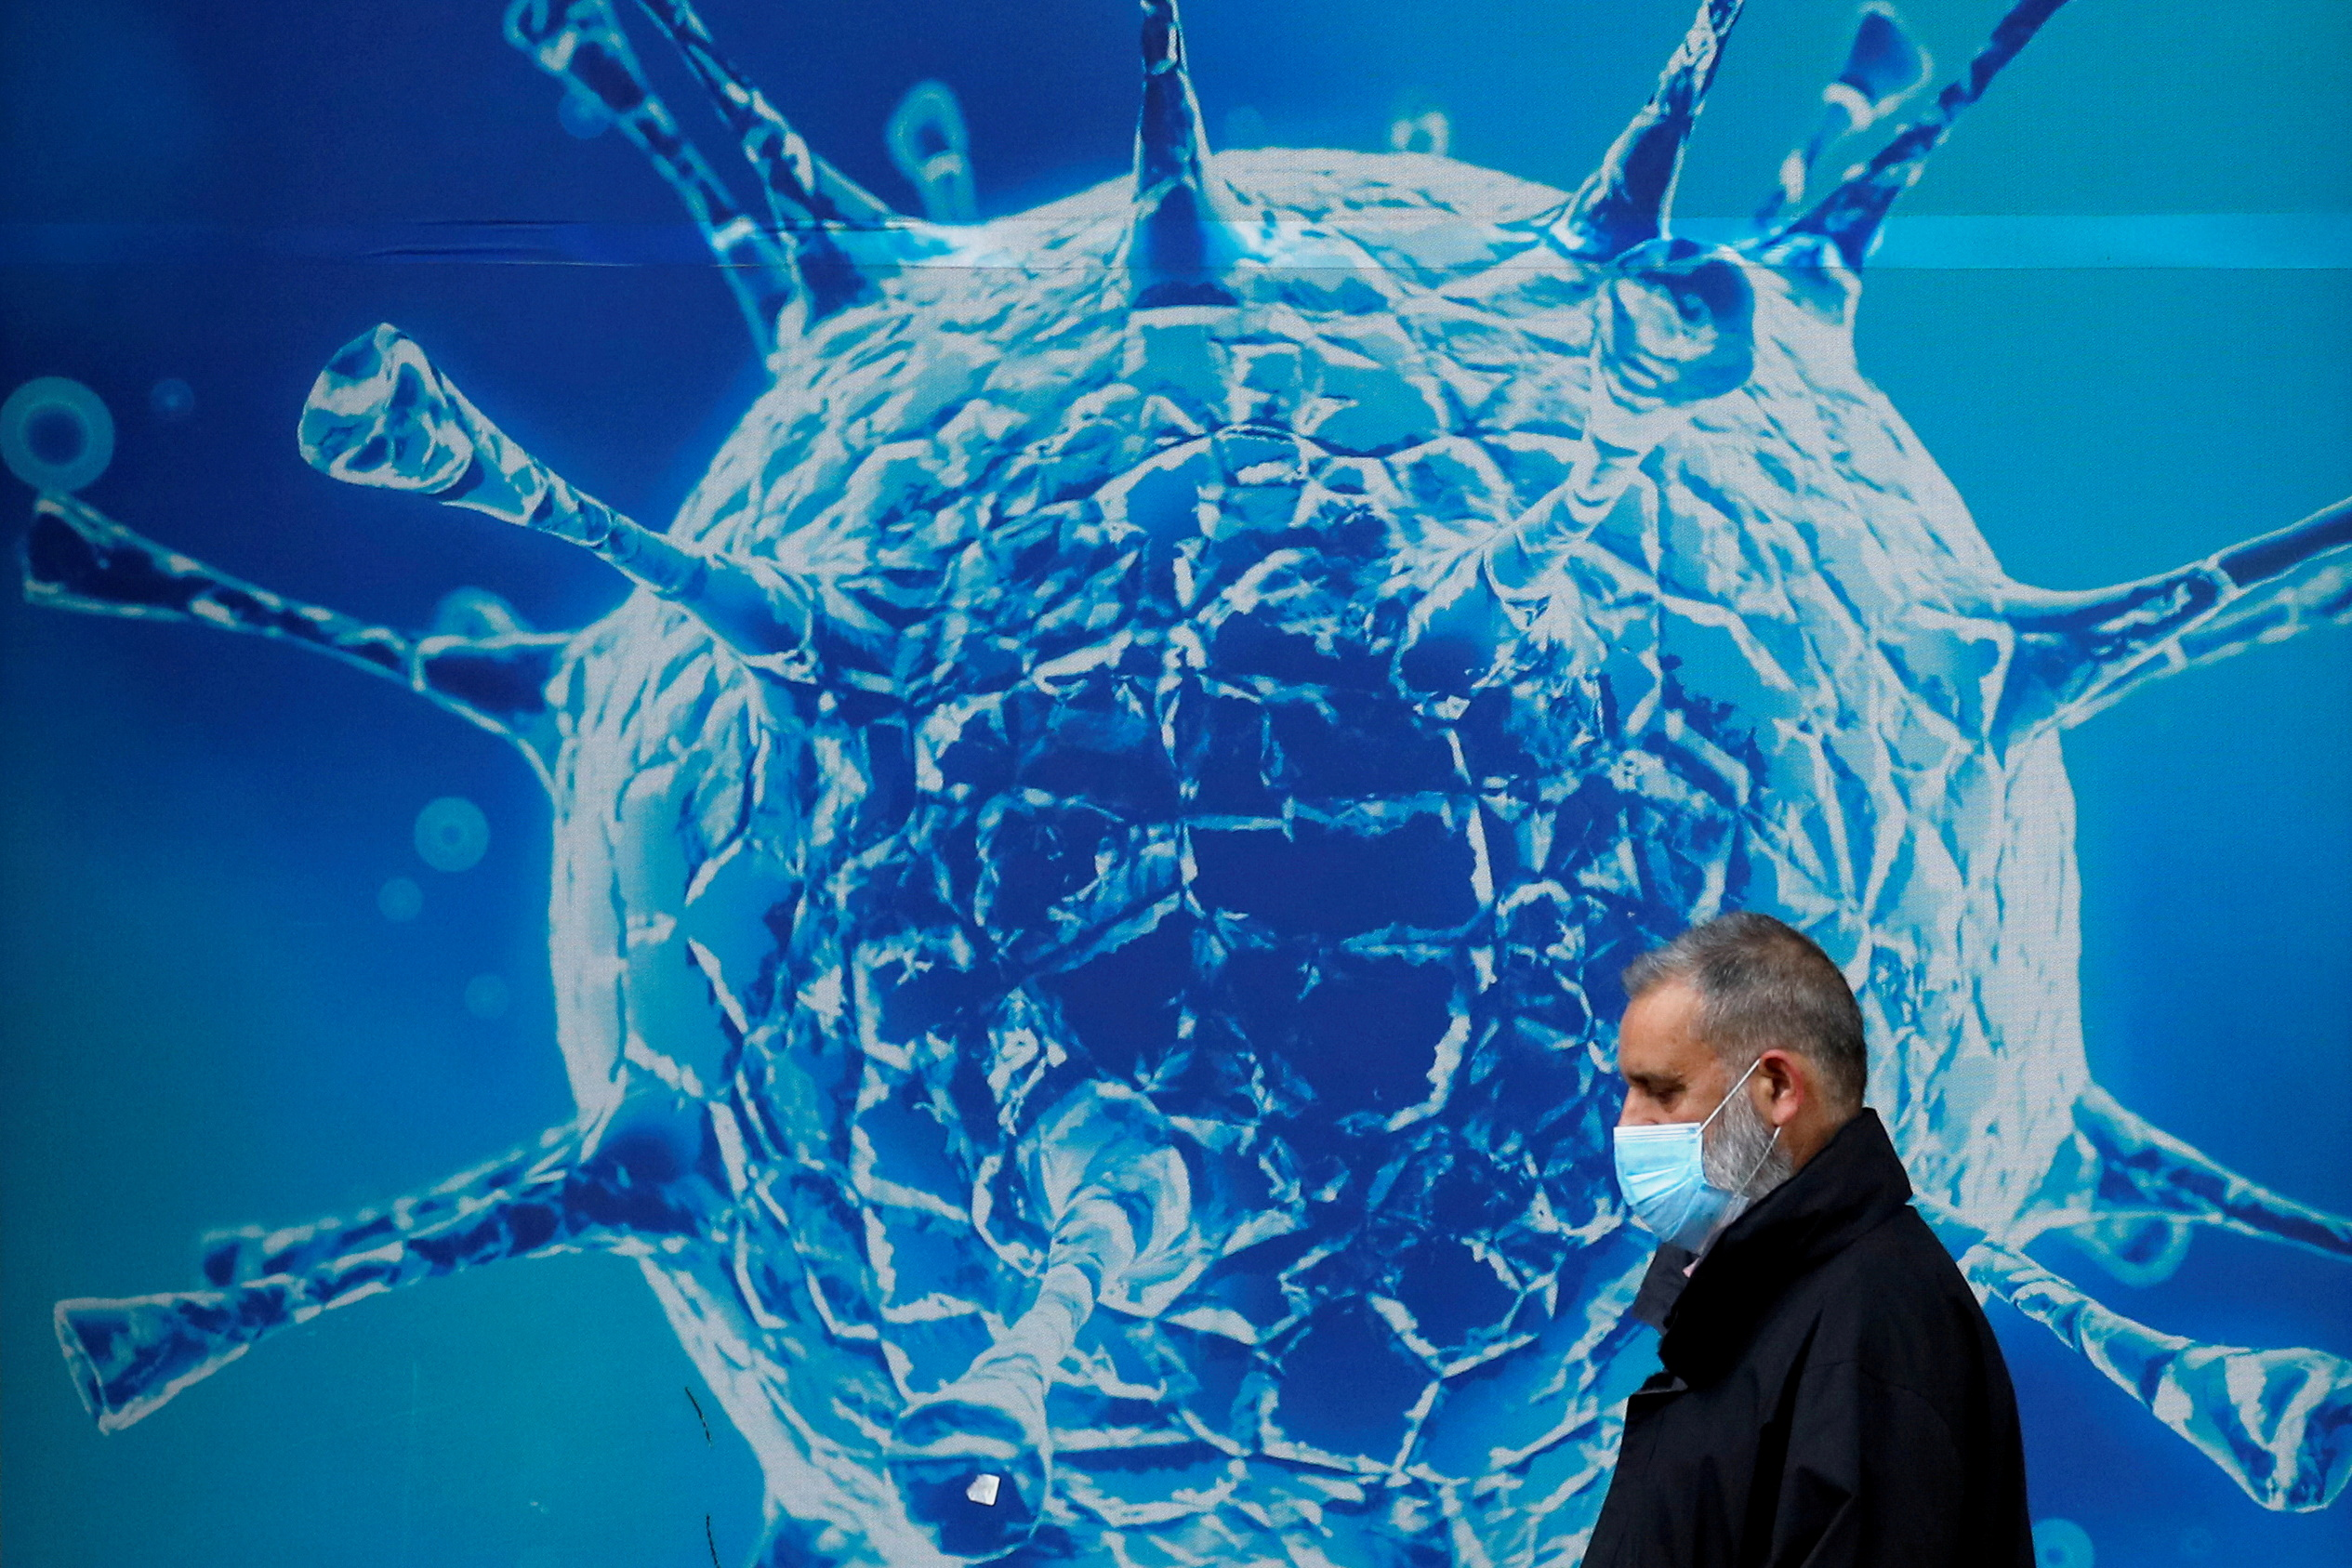

As stated by WHO , Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

Currently, the world is witnessing a coronavirus pandemic that has affected almost every country on the planet. In such events, it is pertinent to spread information faster than the diseases spread themselves.

With this notebook we will try to Analyze the extent of COVID-19 in India and how India is embracing the situation and how vaccination drive is going on.

The dataset is available in [kaggle](https://www.kaggle.com/sudalairajkumar/covid19-in-india)

We are analyzing 5 datas :
- COVID-19 cases at daily level
- Statewise testing details
- Statewise test center details
- Statewise Vaccination details
- Statewise Hospitals Bed availability

In [42]:
#Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [43]:
#Reading cases count dataset
state = pd.read_csv("D:\\Projects\\covid19\\covid_19_india.csv")
state.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [44]:
#Reading vaccination count dataset
vaccine = pd.read_csv("D:\\Projects\\covid19\\covid_vaccine_statewise.csv")
vaccine.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [45]:
#Reading testing count dataset
testing = pd.read_csv("D:\\Projects\\covid19\\StatewiseTestingDetails.csv")
testing.head(5)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [46]:
#Reading the test center dataset
test_center = pd.read_csv("D:\\Projects\\covid19\\TestingLabs.csv")
test_center.head(5)

,State,Test Category,Testing site for Govt Institute,Testing site for Private Institute
0,Andhra Pradesh,RT-PCR,16,53
1,Andhra Pradesh,TrueNat,62,1
2,Andhra Pradesh,CBNAAT,0,3
3,Andhra Pradesh,Other M-NA Testing Platforms,0,1
4,Arunachal Pradesh,RT-PCR,2,0


Getting proper latest info about hospitals present is difficult so we are taking info from [here](https://pib.gov.in/PressReleasePage.aspx?PRID=1539877) to get a brief idea

In [47]:
#Reading the hospital dataset
hospital = pd.read_csv("D:\\Projects\\covid19\\HospitalBedsIndia.csv")
hospital.head(5)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


#### First we will start with Cases count dataset

In [48]:
state.shape

(18110, 9)

In [49]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [50]:
#Checking null values
state.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

We can see that there is no Null Values

In [51]:
# We will drop some columns which are not required for analysis
# Sno is not that important column
# Instead of time we will focus on Date column
# Instead of Confirmed National and International Cases we will use cummulative confirmed cases 
state.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)
state.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [52]:
##Converting Date series to date-time format
state['Date']=pd.to_datetime(state['Date'])

We will now create a new column Active cases for the particular Date for State so we get Active cases each day.

In [53]:
state['Active']=state['Confirmed']-state['Deaths']-state['Cured']
state.tail(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [54]:
#based on dataset we will segregate the dataset based on latest date.
latest_data=state[state['Date']=='2021-08-11']

In [55]:
#Summary
total_cured = latest_data.Cured.sum()
total_death = latest_data.Deaths.sum()
total_confirmed = latest_data.Confirmed.sum()
total_active = latest_data.Active.sum()
total=[(total_cured,total_death,total_confirmed,total_active)]
summary=pd.DataFrame(total,columns=['Total Cured','Total Death','Total Confirmed','Total Active'])
summary

,Total Cured,Total Death,Total Confirmed,Total Active
0,31220981,429179,32036511,386351


In [56]:
#Top 10 state with Active cases 
case_by_state=latest_data.groupby('State/UnionTerritory').sum().sort_values(by='Active',ascending=False).head(10)
fig = px.bar(case_by_state, 
             x=case_by_state.index,
             y=case_by_state.Active,
             labels={"x": "States",  "y": "Active Case Count"},
             title='Top 10 State with highest Active Cases')
fig.show()

#### We can see that Kerala has a Huge Number of active cases compared to other state. Infact the 2nd highest state of Maharashtra have less then half the cases in Kerala .

In [57]:
#Top 10 state with confirmed state
case_by_state=latest_data.groupby('State/UnionTerritory').sum().sort_values(by='Confirmed',ascending=False).head(10)
fig = px.bar(case_by_state, 
             x=case_by_state.index,
             y=case_by_state.Confirmed,
             labels={"x": "States",  "y": "Confirmed Case Count"},
             title='Top 10 State with highest Confirmed Cases')
fig.show()

#### We can see Maharashtra have Highest number of active cases and here we can see that Kerala have almost half the number of confirmed cases compared to Maharashtra

In [58]:
#Top 10 states with death
case_by_state=latest_data.groupby('State/UnionTerritory').sum().sort_values(by='Deaths',ascending=False).head(10)
fig = px.bar(case_by_state, 
             x=case_by_state.index,
             y=case_by_state.Deaths,
             labels={"x": "States",  "y": "Death Case Count"},
             title='Top 10 State with highest Death Cases')
fig.show()

#### Although Kerala have second highest number of confirmed cases still it has considerably very less death count which is quite impressive.

In [59]:
#Top 10 states with higest cured cases
case_by_state=latest_data.groupby('State/UnionTerritory').sum().sort_values(by='Cured',ascending=False).head(10)
fig = px.bar(case_by_state, 
             x=case_by_state.index,
             y=case_by_state.Cured,
             title='Top 10 State with highest Cured Cases')
fig.show()

#### Now we can see that Kerala have 2nd highest number of cured cases which means the health services is doing a great job.

#### We can also see Maharshtra is leading count in all the columns hence we can say that it is the worst affected state of all.

In [60]:
#to get cases date wise
case_by_date=state.groupby('Date').sum()
case_by_date.head(2)

,Cured,Deaths,Confirmed,Active
Date,,,,
2020-01-30,0,0,1,1
2020-01-31,0,0,1,1


In [61]:
#Plot of active cases

fig = px.line(case_by_date, y="Active", title='Active cases of Covid-19')
fig.show()

In [62]:
#plot of confirmed cases
fig = px.line(case_by_date, y="Confirmed", title='Confirmed cases count of Covid-19')
fig.show()

In [63]:
#plot of deaths cases
fig = px.line(case_by_date, y="Deaths", title='Death count of Covid-19')
fig.show()

In [64]:
#plot of cured cases
fig = px.line(case_by_date, y="Cured", title='Cured case count of Covid-19')
fig.show()

#### As we know the Nation went into complete lockdown starting from 25 March 2020 till 31st May 2020 , and then Unlock started in phased manner. Which helped the government prepare for the scenario and we can see from the graph evidently that there is a steep increase in number of cured cases from approx July  <br>
#### Also we can see that once Unlock was started the amount of Confirmed and Active cases showed a sharp growth as many restrictions were lifted. <br>
#### The plot of confirmed , death and cured cases show a similar nature of graph.

In [65]:
# Now we will create 2 more parameter checking Death rate and Cured rate
case_by_state=latest_data.groupby('State/UnionTerritory').sum()
case_by_state['Cure Rate']=(case_by_state['Cured']*100)/case_by_state['Confirmed']
case_by_state['Death Rate']=(case_by_state['Deaths']*100)/case_by_state['Confirmed']
case_by_state.head(2)

,Cured,Deaths,Confirmed,Active,Cure Rate,Death Rate
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,7412,129,7548,7,98.198198,1.709062
Andhra Pradesh,1952736,13564,1985182,18882,98.365591,0.683262


In [66]:
#plot for Cure rate
fig = px.bar(case_by_state.sort_values(by='Cure Rate', ascending=False, inplace=True), x=case_by_state.index,
             y=case_by_state['Cure Rate'],
             labels={"x": "States",  "y": "Cure Rate %"},
             title='Statewise Cure Rate',
             width=1000,height=800)
fig.show()

#### We can observe that Dadra and Nagar Haveli has higest Recovery rate , we can keep in mind that population of Dadra and Nagar Haveli is very less compared to other states . While Mizoram has the lowest recovery rate of all. But we can see that almost all the state have recovery rate of close to 100%

In [67]:
#Statewise death rate
fig = px.bar(case_by_state.sort_values(by='Death Rate', ascending=False, inplace=True), x=case_by_state.index,
             y=case_by_state['Death Rate'],
             labels={"x": "States",  "y": "Death Rate %"},
             title='Statewise Death Rate',
             width=1000,height=800)

fig.show()

#### Interestingly Punjab has higest death rate with over 2.5 % while Mizoram which does not have a great recovery rate , the death rate is also the 2nd lowest.

#### Now will jump to testing dataset

In [68]:
testing.head(5)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [69]:
testing.shape

(16336, 5)

In [70]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [71]:
testing.isnull().sum()

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [72]:
#we will remove the Negative column and calculate again by taking the positive in consideration then drop null values as there is no point impute them
testing.drop(['Negative'],inplace=True,axis=1)
testing['Negative']=testing['TotalSamples']-testing['Positive']
testing=testing.dropna()

In [73]:
#grouby state with taking the max value as that will be the last updated value
testing_state=testing.groupby('State').max()

In [74]:
#getting positive %
testing_state["Positive_percentage"] = ((testing_state["Positive"] / testing_state["TotalSamples"]) * 100)

In [75]:
#State with highest number of samples
testing_state=testing_state.sort_values(by='TotalSamples',ascending=False).head(10)
fig = px.bar(testing_state, x=testing_state.index,
             y=testing_state.TotalSamples,
             title='Top 10 states with highest number of Samples')
fig.show()

#### Madhya Pradesh is High number of test samples compared ot Maharashtra and Kerala which have higest active cases.

In [76]:
# Top 10 positive samples
testing_state=testing_state.sort_values(by='Positive',ascending=False)
fig = px.bar(testing_state, x=testing_state.index,
             y=testing_state.Positive,
             title='Top 10 states with highest number of positive samples')
fig.show()

#### Maharashtra and Kerala have high number of positive test samples

In [77]:
# % of positive cases
testing_state=testing_state.sort_values(by='Positive_percentage',ascending=False).head(10)
fig = px.bar(testing_state, x=testing_state.index,
             y=testing_state.Positive_percentage,
             title='Top 10 states with highest % of positive samples')
fig.show()

#### Maharashtra and Karnataka have higer % of positive samples

#### We will check the testing center data now

In [78]:
test_center.head(2)

,State,Test Category,Testing site for Govt Institute,Testing site for Private Institute
0,Andhra Pradesh,RT-PCR,16,53
1,Andhra Pradesh,TrueNat,62,1


In [79]:
test_center.shape

(144, 4)

In [80]:
test_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               144 non-null    object
 1   Test Category                       144 non-null    object
 2   Testing site for Govt Institute     144 non-null    int64 
 3   Testing site for Private Institute  144 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


#### As we cann see there is no null value in the datset we can start getting insight.
##### First we will check what are different type of Test Category.

In [81]:
test_center['Test Category'].unique()

array(['RT-PCR', 'TrueNat', 'CBNAAT', 'Other M-NA Testing Platforms'],
      dtype=object)

- Real-time reverse transcriptase-polymerase chain reaction (RT-PCR) is one of the most used tests for COVID-19. In the RT-PCR test, a sample of nose or throat swab is taken of the person to analyze the genetic fragments of the virus.<br>
- TrueNat is a chip-based test for detecting SARS-COV-2 E-gene that holds the traits of coronavirus. The TrueNat test gives out fast results compared to the RT-PCR test as it is automated. TrueNat utilizes the throat and nose swab samples to identify the presence of a virus. Also, a TrueNat test is rapid and portable which allows healthcare professionals to set up mobile centers.<br>
- The CBNAAT COVID-19 test is alternate Cartridge-based nucleic acid amplification test (CBNAAT).  It is  reportedly quicker and the machines for the test are also easily available across the country.<br>

So we can say that more the TrueNat and CBNAAT system in a state most faster the samples can be tested.

In [82]:
#Number of test center
print("Total Number of Govt Test Centers is :",test_center['Testing site for Govt Institute'].sum())
print("Total Number of Private Test Centers is :",test_center['Testing site for Private Institute'].sum())

Total Number of Govt Test Centers is : 1326
Total Number of Private Test Centers is : 1548


In [83]:
#Number of testing center by Test Category
test_center_by_category=test_center.groupby('Test Category').sum()
test_center_by_category

,Testing site for Govt Institute,Testing site for Private Institute
Test Category,,
CBNAAT,43,87
Other M-NA Testing Platforms,7,13
RT-PCR,647,1122
TrueNat,629,326


In [84]:
fig = make_subplots(rows=1, cols=2,subplot_titles=('Government Facilities', 'Private Facilities'))

fig.add_trace(
    go.Bar(x=test_center_by_category.index,
             y=test_center_by_category['Testing site for Govt Institute']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=test_center_by_category.index,
             y=test_center_by_category['Testing site for Private Institute']),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Test facilities in India based on Govt and Private Ownership")
fig.show()

#### We can see that RTPCR is present in huge number in Country by both Governement and Private Facilities . The TrueNat is highly available in Govt Facilities but the CBNAAT is done slightly more by Private facilities.

In [85]:
#Get total number of test centers
total_site=test_center['Testing site for Govt Institute']+test_center['Testing site for Private Institute']
test_center['total_test_site']=total_site

In [86]:
#Top 10 count for number of test centers
test_center_top10=test_center.groupby('State').sum().sort_values(by=['total_test_site'],ascending=False).iloc[:10]

In [87]:
#plotting the count
fig = px.bar(test_center_top10, x=test_center_top10.index,
             y=test_center_top10.total_test_site,
             title='Top 10 states with highest number of both Govt and Private testing institute')
fig.show()

#### Tamil Nadu has highest number of testing facilities and followed closely by Maharashtra and Uttar Pradesh .

In [88]:
#now groypby state and check private and govt institutes
test_center_by_state_govt=test_center.groupby('State').sum().sort_values(by=['Testing site for Govt Institute'],ascending=False).iloc[:10]
test_center_by_state_private=test_center.groupby('State').sum().sort_values(by=['Testing site for Private Institute'],ascending=False).iloc[:10]

In [89]:
fig = make_subplots(rows=2, cols=1,subplot_titles=('Top 10 by number of Government Facilities', 'Top 10 by number of Private Facilities'))

fig.add_trace(
    go.Bar(x=test_center_by_state_govt.index,
             y=test_center_by_state_govt['Testing site for Govt Institute']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=test_center_by_state_private.index,
             y=test_center_by_state_private['Testing site for Private Institute']),
    row=2, col=1
)

fig.update_layout(height=1000, width=1000, title_text="Number of Government and Private Test facilities in India based ")
fig.show()

#### From the plot it can be seen that Tamil Nadu have Highest Number of testing centres . Also we can see a trend that in Top 10 for Govt Facilities majorly the states are from North India while for Private it is being dominant by Southern states.

In [90]:
# Now we will check how it rank with number of TrueNAT & CBNAAT testing to see the trend
test_center_NAT=test_center[test_center['Test Category']=='TrueNat'].sort_values(by=['total_test_site'],ascending=False).iloc[:10]
test_center_CBNAAT=test_center[test_center['Test Category']=='CBNAAT'].sort_values(by=['total_test_site'],ascending=False).iloc[:10]

In [91]:
fig = make_subplots(rows=2, cols=1,subplot_titles=('Top 10 State by number of TrueNAT testing facilities', 'Top 10 State by number of CBNAAT testing facilities'))

fig.add_trace(
    go.Bar(x=test_center_NAT.State,
             y=test_center_NAT['total_test_site']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=test_center_CBNAAT.State,
             y=test_center_CBNAAT['total_test_site']),
    row=2, col=1
)

fig.update_layout(height=1000, width=1000, title_text="Top 10 states with highest number of TrueNAT and CBNAAT testing facilities")
fig.show()

#### Uttar Pradesh has Highest number of centers with TrueNAT testing and Maharashtra have highest number of centers with CBNAAT testing.

#### Now we will check the Hospital Dataset

In [92]:
#Removing All India data
hospital.head(4)
hospital=hospital[hospital['State/UT']!='All India']

In [93]:
hospital.shape

(36, 12)

In [94]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               36 non-null     int64  
 1   State/UT                          36 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      36 non-null     object 
 3   NumCommunityHealthCenters_HMIS    36 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      29 non-null     float64
 5   NumDistrictHospitals_HMIS         36 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  36 non-null     int64  
 7   NumPublicBeds_HMIS                36 non-null     int64  
 8   NumRuralHospitals_NHP18           36 non-null     int64  
 9   NumRuralBeds_NHP18                36 non-null     int64  
 10  NumUrbanHospitals_NHP18           36 non-null     int64  
 11  NumUrbanBeds_NHP18                36 non-null     int64  
dtypes: float64

In [95]:
#Number of public hospital
fig = px.bar(hospital.sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False, inplace=True), x=hospital['State/UT'],
             y=hospital['TotalPublicHealthFacilities_HMIS'],
             labels={"x": "States/UT",  "y": "Total Number of Heath Facilities"},
             title='Statewise Public Health Facilities Count',
             width=1000,height=800)

fig.show()

In [96]:
#Number of public hospital by bed 
fig = px.bar(hospital.sort_values(by='NumPublicBeds_HMIS', ascending=False, inplace=True), x=hospital['State/UT'],
             y=hospital['NumPublicBeds_HMIS'],
             labels={"x": "States/UT",  "y": "Total Number of Bed available in Heath Facilities"},
             title='Statewise Public Health Facilities Bed Count',
             width=1000,height=800)

fig.show()

From the above 2 plot we can say that having more number of hospital dosent mean they will have adequate number of beds as we can see Tamil Nadu have less number of health care facilites then Uttar Pradesh but have high number of beds .

We can see that from hospital and testing site that Tamil Nadu was apprantly well prepared to tackle the situation with high number of testing facilities and bed availables followed by Maharashtra and Uttar Pradesh 

In [97]:
# Now we will check the rural places hospital scenario
fig = px.bar(hospital.sort_values(by='NumRuralBeds_NHP18', ascending=False, inplace=True), x=hospital['State/UT'],
             y=hospital['NumRuralBeds_NHP18'],
             labels={"x": "States/UT",  "y": "Total Number of Bed available in Rural Heath Facilities"},
             title='Statewise Public Health Facilities Bed Count in Rural areas',
             width=1000,height=800)

fig.show()

Tamil Nadu and Uttar Pradesh have high number of beds present in rural areas giving then a headstart in case of combating Covid-19 in rural areas.

In [98]:
# Now we will check the urban places hospital scenario
fig = px.bar(hospital.sort_values(by='NumUrbanBeds_NHP18', ascending=False, inplace=True), x=hospital['State/UT'],
             y=hospital['NumUrbanBeds_NHP18'],
             labels={"x": "States/UT",  "y": "Total Number of Bed available in Urban Heath Facilities"},
             title='Statewise Public Health Facilities Bed Count in Urban areas',
             width=1000,height=800)

fig.show()

Here we see that less number of public beds are present in likes of Tamil Madu and Uttar Pradesh as compared to presence in Rural areas, this can be due to the fact in Urban areas the number govt hospital is less compared to private hospital . <br>
And this data contains info about govt hospitals only.

#### Now we will check the vaccination dataset

In [99]:
vaccine.head(2)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0


In [100]:
vaccine.shape

(7845, 24)

In [101]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [102]:
vaccine.isnull().sum()*100/len(vaccine)

Updated On                              0.000000
State                                   0.000000
Total Doses Administered                2.855322
Sessions                                2.855322
 Sites                                  2.855322
First Dose Administered                 2.855322
Second Dose Administered                2.855322
Male (Doses Administered)               4.894837
Female (Doses Administered)             4.894837
Transgender (Doses Administered)        4.894837
 Covaxin (Doses Administered)           2.855322
CoviShield (Doses Administered)         2.855322
Sputnik V (Doses Administered)         61.822817
AEFI                                   30.681963
18-44 Years (Doses Administered)       78.304653
45-60 Years (Doses Administered)       78.304653
60+ Years (Doses Administered)         78.304653
18-44 Years(Individuals Vaccinated)    52.415551
45-60 Years(Individuals Vaccinated)    52.402804
60+ Years(Individuals Vaccinated)      52.402804
Male(Individuals Vac

#### We will not fill the Null values as there is a huge chance we can get wrong interpretation.

In [103]:
vaccineIndia=vaccine[vaccine['State']=='India']
fig = px.line(vaccineIndia, y="Total Doses Administered",x="Updated On" ,title='Vaccination Trend for Covid-19')
fig.show()

In [104]:
#male and female vaccination status
male = vaccine["Male(Individuals Vaccinated)"].max() 
female = vaccine["Female(Individuals Vaccinated)"].max()  
trans = vaccine["Transgender(Individuals Vaccinated)"].max()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

#### We can see that Males are slightly high more vaccinated compared to Females

In [105]:
#Vaccine doses
covaxin = vaccine[" Covaxin (Doses Administered)"].max() 
covishield = vaccine["CoviShield (Doses Administered)"].max()  
sputnik = vaccine["Sputnik V (Doses Administered)"].max()
px.pie(names=["Covaxin","Covishield","Sputnik"],values=[covaxin,covishield,sputnik],title="Vaccination data for different vaccines for Covid19")

#### Covishield was administered in huge number.

In [106]:
#Vaccination sites
fig = px.line(vaccineIndia, y=" Sites ",x="Updated On" ,title='Vaccination Sites for Covid-19')
fig.show()

#### We can see that there is very ragged behviour between sites open for vaccination different dates.

In [107]:
# Vaccination Trend for Covid-19 for different Age Group
fig = px.line(vaccineIndia, y=["18-44 Years(Individuals Vaccinated)","45-60 Years(Individuals Vaccinated)","60+ Years(Individuals Vaccinated)"],
              x="Updated On" ,
              title='Vaccination Trend for Covid-19 for different Age Group')
fig.show()

#### We can see different trend in 3 plots
- For 18-44 Years we can see that there is a sudden increase in the individuals being vaccinated similar to x^2 graph in 1st Quadrant.
- For 60+ Years and 45-60 Years the plot is almost identical to liner graph

In [108]:
#Dosage plot
fig = px.line(vaccineIndia,  y=["First Dose Administered","Second Dose Administered"],
              x="Updated On", 
             title='First and Second Dose Tracker')
fig.show()

<b>There is a slow increase in graph for second dose as most number of people are administered with Covishield and there is a gap of 12 - 16 week between 2 shots of Covishield</b>

In [109]:
#Getting statewise info
statewise_vaccine=vaccine[vaccine['Updated On']=='09/08/2021']
statewise_vaccine=statewise_vaccine[statewise_vaccine['State']!='India']

In [110]:
#Getting higest vaccine administered state
statewise_vaccine_count=statewise_vaccine.sort_values(by='Total Doses Administered',ascending=False).head(10)
fig = px.bar(statewise_vaccine_count, x="State",
             y='Total Doses Administered',
             title='Top 10 states with higest vaccine administered state')
fig.show()

#### Uttar Pradesh is state where high number of doses were administered as it is the most populous state of India

In [111]:
#Second Dose Per Total
statewise_vaccine["SecondDosePerTotal"]=statewise_vaccine["Second Dose Administered"]*100/statewise_vaccine["Total Doses Administered"]

In [112]:
#States distribtuion with higest second dose vaccinated
statewise_vaccine_count=statewise_vaccine.sort_values(by='SecondDosePerTotal',ascending=False).head(10)
fig = px.bar(statewise_vaccine_count, x="State",
             y='SecondDosePerTotal',
             title='Top 10 states with higest second dose vaccinated %')
fig.show()

#### Now we can see why Kerala has less death rate as there are many people who have taken the both the doses of vaccine

In [113]:
#Only First Dose and proportion of people who took only 1st dose
statewise_vaccine["onlyFirstDose"]=statewise_vaccine["Total Doses Administered"]-statewise_vaccine["Second Dose Administered"]
statewise_vaccine["onlyFirstDoseProp"]=statewise_vaccine["onlyFirstDose"]*100/statewise_vaccine["Total Doses Administered"]

In [114]:
#States distribtuion with higest only 1st dose vaccinated
statewise_vaccine_count=statewise_vaccine.sort_values(by='onlyFirstDoseProp',ascending=False).head(10)
fig = px.bar(statewise_vaccine_count, x="State",
             y='onlyFirstDoseProp',
             title='Top 10 States distribtuion with higest only 1st dose vaccinated %')
fig.show()

#### We can see many smaller states are present where only single dose of vaccine is being taken

In [115]:
#Statewise proportion of covaxin administered
px.pie(names=statewise_vaccine['State'],values=statewise_vaccine[' Covaxin (Doses Administered)'],title="Vaccination data for different states for Covaxin for Covid19",width=800, height=1000)

#### Covaxin was highly administered in Uttar Pradesh followed closely by Maharashtra

In [116]:
#Statewise proportion of covishield administered
px.pie(names=statewise_vaccine['State'],values=statewise_vaccine['CoviShield (Doses Administered)'],title="Vaccination data for different states for Covishield for Covid19",width=800, height=1000)

#### Same trend is observed for Covishield also.